# Baseball Data Wrangle
------

<h4 align="center">[Define question](#question) <- | -> [Wrangle data](#wrangle) <- | -> [Explore data ](#explore) <- | -> [Conclude / predict / interpret data](#analysis) <- | -> [To-do](#To-do) </h4> 
   

<a id= 'question'></a>

---  
## I. Define question

_ __League level__: How has the home run to stikeout ratio changed over the years? _
     
     
- Relation to runs / game?  
- Relation to max individual player home runs (HR) each year (and mean, median, etc.)?  
- Relation to max individual player strikeouts (SO) each year (and mean, median, etc.)?  
- Look for visual proof of big events: strikes, 'eras', DH, etc.      
  
  
_ __Team level__: How well does offense, defense, pitching predict success (wins, playoffs, etc.)? _

- Linear regression: offense / defense / pitching predicting wins
- Logistic regression: off / def / pitch predicting playoffs / WS

- Use '5 tools' as predictors: avg, power, speed, arm, glove

<h4 align="center">[Define question](#question) <- | -> [Wrangle data](#wrangle) <- | -> [Explore data ](#explore) <- | -> [Conclude / predict / interpret data](#analysis) <- | -> [To-do](#To-do) </h4> 
   

<a id= 'wrangle'></a>

---  
## II. Wrangle data

__Import packages needed for data wrangling, exploration & visualization.__

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# view plots in notebook
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


__View sources of data.__

* [Lahman data](http://www.seanlahman.com/baseball-archive/statistics/)

* [Fangraphs offensive data](http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=8&season=2016&month=0&season1=1916&ind=1&team=0,ts&rost=0&age=0&filter=&players=0&sort=1,a)

* [Fangraphs defensive data](http://www.fangraphs.com/leaders.aspx?pos=all&stats=fld&lg=all&qual=0&type=1&season=2016&month=0&season1=1916&ind=1&team=0,ts&rost=0&age=0&filter=&players=0) (only goes back to 2002)

* [Fangraphs pitching data](http://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=c,4,5,11,7,8,16,13,-1,36,37,40,43,44,48,51,-1,6,45,62,-1,59&season=2016&month=0&season1=1916&ind=1&team=0,ts&rost=0&age=0&filter=&players=0)

* [Fangraphs 5-tools data](http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=c,4,5,6,23,40,58,60,199&season=2016&month=0&season1=1916&ind=1&team=0,ts&rost=0&age=0&filter=&players=0)

__Import needed data.__

In [2]:
# import Lahman data
batting = pd.read_csv("data/baseballdatabank-master/core/Batting.csv")
pitching = pd.read_csv("data/baseballdatabank-master/core/Pitching.csv")
teams = pd.read_csv("data/baseballdatabank-master/core/Teams.csv")

In [3]:
# import FG data
fg_off = pd.read_csv('data/FG_offense.csv', encoding="utf-8-sig")
fg_def = pd.read_csv('data/FG_fielding.csv', encoding="utf-8-sig")
fg_pit = pd.read_csv('data/FG_pitching.csv', encoding="utf-8-sig")
fg_five = five = pd.read_csv('data/FG_fivetools.csv', encoding="utf-8-sig")

__Merge datasets together.__

In [4]:
# add prefix to col names first to prevent confusion after merging
# remove prefix (& rename) from first two columns - probably better way to do this :)

fg_pit.columns = 'pit_' + fg_pit.columns
fg_pit.rename(columns={'pit_\"Season\"': 'Year', 'pit_Team': 'Team'}, inplace=True)

fg_off.columns = 'off_' + fg_off.columns
fg_off.rename(columns={'off_\"Season\"': 'Year', 'off_Team': 'Team'}, inplace=True)

fg_def.columns = 'def_' + fg_def.columns
fg_def.rename(columns={'def_\"Season\"': 'Year', 'def_Team': 'Team'}, inplace=True)

fg_five.rename(columns={'\"Season\"': 'Year'}, inplace=True)

batting.columns = 'bat_' + batting.columns
batting.rename(columns={'bat_playerID':'playerID', 'bat_yearID':'Year', 'bat_stint':'stint', 'bat_teamID':'Team',
                 'bat_lgID':'lgID'}, inplace=True)

pitching.columns = 'pit_' + pitching.columns
pitching.rename(columns={'pit_playerID':'playerID', 'pit_yearID':'Year', 'pit_stint':'stint', 'pit_teamID':'Team',
                 'pit_lgID':'lgID'}, inplace=True)

In [5]:
# check to make sure it worked
fg_five.tail()

,Year,Team,G,AB,PA,AVG,ISO,WAR,Spd,Def
2191,1965,Mets,2316,5441,5976,0.221,0.106,-0.2,2.9,19.9
2192,1963,Mets,2171,5336,5921,0.219,0.096,-4.6,3.4,-38.3
2193,1972,Rangers,2068,5029,5680,0.217,0.073,1.4,4.0,1.0
2194,1964,Colt .45's,1948,5303,5859,0.229,0.086,-0.9,3.5,-27.0
2195,1963,Colt .45's,1995,5384,5983,0.220,0.081,-0.7,3.5,-38.0


In [6]:
batting.columns

Index([u'playerID', u'Year', u'stint', u'Team', u'lgID', u'bat_G', u'bat_AB',
       u'bat_R', u'bat_H', u'bat_2B', u'bat_3B', u'bat_HR', u'bat_RBI',
       u'bat_SB', u'bat_CS', u'bat_BB', u'bat_SO', u'bat_IBB', u'bat_HBP',
       u'bat_SH', u'bat_SF', u'bat_GIDP'],
      dtype='object')

In [7]:
# merge batting and pitching data from Lahman datasets 
lahman = pd.merge(batting,pitching,how='outer',on=['playerID','Year','stint','Team','lgID'])

In [8]:
# check to make sure it worked
lahman.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Year,stint,bat_G,bat_AB,bat_R,bat_H,bat_2B,bat_3B,bat_HR,bat_RBI,...,pit_IBB,pit_WP,pit_HBP,pit_BK,pit_BFP,pit_GF,pit_R,pit_SH,pit_SF,pit_GIDP
count,101332.000000,101332.000000,101332.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,95759.000000,...,29564.000000,44006.000000,43580.000000,44139.000000,43900.000000,44006.000000,44139.000000,11239.000000,11239.000000,745.000000
mean,1963.506533,1.077567,51.400111,149.970327,19.887038,39.261647,6.637067,1.373361,2.949305,17.965163,...,2.447064,2.534836,2.271111,0.303881,345.551572,6.355611,43.332291,2.207759,1.908088,4.844295
std,38.628278,0.283676,47.145273,186.557072,28.671365,53.310941,9.801563,2.710547,6.409662,26.756514,...,2.792671,3.438515,3.008115,0.759298,350.259188,10.003279,43.437952,2.751917,2.143002,5.524863
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1933.000000,1.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1972.000000,1.000000,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1997.000000,1.000000,80.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2015.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,36.000000


__Calculate new variables.__

In [9]:
teams.columns

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')

In [10]:
# add "playoffs" bool to Teams 
teams['playoffs'] = (teams['DivWin'] == "Y") | (teams['WCWin'] == "Y")
# extract needed vars 
keep = ['yearID','lgID','franchID','G','W','L','DivWin','WCWin','LgWin','WSWin', 'playoffs']
teams_keep = teams[keep]
teams_keep.tail()

,yearID,lgID,franchID,G,W,L,DivWin,WCWin,LgWin,WSWin,playoffs
2800,2015,NL,LAD,162,92,70,Y,N,N,N,True
2801,2015,NL,SFG,162,84,78,N,N,N,N,False
2802,2015,NL,ARI,162,79,83,N,N,N,N,False
2803,2015,NL,SDP,162,74,88,N,N,N,N,False
2804,2015,NL,COL,162,68,94,N,N,N,N,False


__Important dates for subsetting data:__  

* 1916 - present: first year in Lahman data with only AL & NL
* 1963 - present: 10 years prior to DH
* 2002 - present: first year in FG defensive data
* 2015: last year of Lahman data available (as of Nov 2016)

In [11]:
# select first year to subset data 
# use 2002 for defensive data
sel = 1986

In [12]:
# filter data by year
fg_off = fg_off[(fg_off['Year'] >= sel) & (fg_off['Year'] <= 2015)]
fg_pit = fg_pit[(fg_pit['Year'] >= sel) & (fg_pit['Year'] <= 2015)]
fg_def = fg_def[(fg_def['Year'] >= sel) & (fg_def['Year'] <= 2015)]
fg_five = fg_five[(fg_five['Year'] >= sel) & (fg_five['Year'] <= 2015)]

teams = teams_keep[(teams_keep['yearID'] >= sel) & (teams_keep['yearID'] <= 2015)]

lahman = lahman[(lahman['Year'] >= sel) & (lahman['Year'] <= 2015)]
batting = batting[(batting['Year'] >= sel) & (lahman['Year'] <= 2015)]

__Need to add FG data to Teams data. Need to reconcile team IDs first.__

In [13]:
# merge data from FG datasets into one df on 'Year', 'Team'
fg_off_pit = pd.merge(fg_off, fg_pit, how='outer', on = ['Year','Team'])
fg_merge = pd.merge(fg_off_pit, fg_def, how='outer', on = ['Year','Team'])

In [14]:
# merge FG data with Lahman Teams data (for win/loss/playoffs/etc.)

# FG teams data
fg_teams = np.unique(fg_five['Team'])
# fg_teams = np.unique(fg_merge['Team'])
print(len(fg_teams))
fg_teams

32


array([u'Angels', u'Astros', u'Athletics', u'Blue Jays', u'Braves',
       u'Brewers', u'Cardinals', u'Cubs', u'Devil Rays', u'Diamondbacks',
       u'Dodgers', u'Expos', u'Giants', u'Indians', u'Mariners',
       u'Marlins', u'Mets', u'Nationals', u'Orioles', u'Padres',
       u'Phillies', u'Pirates', u'Rangers', u'Rays', u'Red Sox', u'Reds',
       u'Rockies', u'Royals', u'Tigers', u'Twins', u'White Sox', u'Yankees'], dtype=object)

In [15]:
# Teams teams data
teams_teams = np.unique(teams['franchID'])
print(len(teams_teams))
teams_teams

30


array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE',
       'COL', 'DET', 'FLA', 'HOU', 'KCR', 'LAD', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBD',
       'TEX', 'TOR', 'WSN'], dtype=object)

In [16]:
# NEED TO REWORK THIS FOR TEAMS <= 1963
# will keep FG team data & rename Teams teams data

# remove this line if not using fg_five
fg_merge = fg_five

# rename Expos, Nationals to 'Expos/Nationals'
fg_merge.replace({'Expos':'Expos/Nationals','Nationals':'Expos/Nationals'}, inplace=True)
# rename Devil Rays to 'Rays'
fg_merge.replace({'Devil Rays':'Devil Rays/Rays','Rays':'Devil Rays/Rays'}, inplace=True)
# rename Colt 45s to 'Astros'
fg_merge.replace({'Colt .45\'s':'Astros',}, inplace=True)
# rename Bees to 'Braves'
fg_merge.replace({'Bees':'Braves'}, inplace=True)
# rename Browns to 'Orioles'
fg_merge.replace({'Browns':'Orioles'}, inplace=True)
# rename Redlegs to 'Reds'
fg_merge.replace({'Redlegs':'Reds'}, inplace=True)
# rename Pilots to 'Brewers'
fg_merge.replace({'Pilots':'Brewers'}, inplace=True)
# rename Robins to 'Dodgers'
fg_merge.replace({'Robins':'Dodgers'}, inplace=True)
# rename Senators (1901–60) to Twins; Senators (1961–71) to Rangers
if fg_merge[fg_merge['Year']<=1960].bool:
    fg_merge.replace({'Senators':'Twins'}, inplace=True)
else:
    fg_merge.replace({'Senators':'Rangers'}, inplace=True)
# confirm there are now 30 teams
len(np.unique(fg_merge['Team']))

//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


30

In [17]:
np.unique(fg_merge['Team'])

array([u'Angels', u'Astros', u'Athletics', u'Blue Jays', u'Braves',
       u'Brewers', u'Cardinals', u'Cubs', 'Devil Rays/Rays',
       u'Diamondbacks', u'Dodgers', 'Expos/Nationals', u'Giants',
       u'Indians', u'Mariners', u'Marlins', u'Mets', u'Orioles', u'Padres',
       u'Phillies', u'Pirates', u'Rangers', u'Red Sox', u'Reds',
       u'Rockies', u'Royals', u'Tigers', u'Twins', u'White Sox', u'Yankees'], dtype=object)

In [18]:
# view two lists of teams data again
print(len((np.unique(fg_merge['Team']))))
print(np.unique(fg_merge['Team']))
print(len(np.unique(teams['franchID'])))
print(np.unique(teams['franchID']))

30
[u'Angels' u'Astros' u'Athletics' u'Blue Jays' u'Braves' u'Brewers'
 u'Cardinals' u'Cubs' 'Devil Rays/Rays' u'Diamondbacks' u'Dodgers'
 'Expos/Nationals' u'Giants' u'Indians' u'Mariners' u'Marlins' u'Mets'
 u'Orioles' u'Padres' u'Phillies' u'Pirates' u'Rangers' u'Red Sox' u'Reds'
 u'Rockies' u'Royals' u'Tigers' u'Twins' u'White Sox' u'Yankees']
30
['ANA' 'ARI' 'ATL' 'BAL' 'BOS' 'CHC' 'CHW' 'CIN' 'CLE' 'COL' 'DET' 'FLA'
 'HOU' 'KCR' 'LAD' 'MIL' 'MIN' 'NYM' 'NYY' 'OAK' 'PHI' 'PIT' 'SDP' 'SEA'
 'SFG' 'STL' 'TBD' 'TEX' 'TOR' 'WSN']


In [19]:
# replace team names in Teams with FG team names
teams.replace({'ANA':'Angels','ARI':'Diamondbacks','ATL':'Braves','BAL':'Orioles','BOS':'Red Sox','CHC':'Cubs',
                   'CHW':'White Sox','CIN':'Reds','CLE':'Indians','COL':'Rockies','DET':'Tigers','FLA':'Marlins',
                   'HOU':'Astros','KCR':'Royals','LAD':'Dodgers','MIL':'Brewers','MIN':'Twins','NYM':'Mets',
                   'NYY':'Yankees','OAK':'Athletics','PHI':'Phillies','PIT':'Pirates','SDP':'Padres','SEA':'Mariners',
                   'SFG':'Giants','STL':'Cardinals','TBD':'Devil Rays/Rays','TEX':'Rangers','TOR':'Blue Jays',
                   'WSN':'Expos/Nationals'},inplace=True)

# confirm new names
print(len(np.unique(teams['franchID'])))
np.unique(teams['franchID'])

30


array(['Angels', 'Astros', 'Athletics', 'Blue Jays', 'Braves', 'Brewers',
       'Cardinals', 'Cubs', 'Devil Rays/Rays', 'Diamondbacks', 'Dodgers',
       'Expos/Nationals', 'Giants', 'Indians', 'Mariners', 'Marlins',
       'Mets', 'Orioles', 'Padres', 'Phillies', 'Pirates', 'Rangers',
       'Red Sox', 'Reds', 'Rockies', 'Royals', 'Tigers', 'Twins',
       'White Sox', 'Yankees'], dtype=object)

In [24]:
# rename Teams columns to match FG data
teams.rename(columns={'yearID': 'Year', 'franchID': 'Team'}, inplace=True)

# merge Teams and FG data
all_raw = pd.merge(fg_merge, teams, how='outer', on =['Year','Team'])

In [25]:
all_raw.head()

,Year,Team,G_x,AB,PA,AVG,ISO,WAR,Spd,Def,lgID,G_y,W,L,DivWin,WCWin,LgWin,WSWin,playoffs
0,1996,Mariners,1736,5668,6518,0.287,0.197,37.1,4.4,33.1,AL,161,85,76,N,N,N,N,False
1,1996,Indians,1705,5681,6486,0.293,0.182,30.2,4.9,-35.0,AL,161,99,62,Y,N,N,N,True
2,1999,Indians,1859,5634,6554,0.289,0.177,34.4,5.1,18.6,AL,162,97,65,Y,N,N,N,True
3,1995,Indians,1527,5028,5686,0.291,0.188,27.8,4.8,-24.1,AL,144,100,44,Y,N,Y,N,True
4,1994,Yankees,1192,3986,4611,0.290,0.172,23.4,3.9,-16.0,AL,113,70,43,NaN,NaN,NaN,NaN,False


In [26]:
# subset stats we want
five = all_raw.drop(['G_x','AB','PA','G_y'], axis=1)

# reset Year from float to int
five["Year"] = five["Year"].astype(int)

five.head() 

,Year,Team,AVG,ISO,WAR,Spd,Def,lgID,W,L,DivWin,WCWin,LgWin,WSWin,playoffs
0,1996,Mariners,0.287,0.197,37.1,4.4,33.1,AL,85,76,N,N,N,N,False
1,1996,Indians,0.293,0.182,30.2,4.9,-35.0,AL,99,62,Y,N,N,N,True
2,1999,Indians,0.289,0.177,34.4,5.1,18.6,AL,97,65,Y,N,N,N,True
3,1995,Indians,0.291,0.188,27.8,4.8,-24.1,AL,100,44,Y,N,Y,N,True
4,1994,Yankees,0.290,0.172,23.4,3.9,-16.0,AL,70,43,NaN,NaN,NaN,NaN,False


In [27]:
# write to csv
five.to_csv('data/five_reg.csv',index=False)

In [23]:
teams

,Year,lgID,Team,G,W,L,DivWin,WCWin,LgWin,WSWin,playoffs
1943,1986,NL,Braves,161,72,89,N,NaN,N,N,False
1944,1986,AL,Orioles,162,73,89,N,NaN,N,N,False
1945,1986,AL,Red Sox,161,95,66,Y,NaN,Y,N,True
1946,1986,AL,Angels,162,92,70,Y,NaN,N,N,True
1947,1986,AL,White Sox,162,72,90,N,NaN,N,N,False
1948,1986,NL,Cubs,160,70,90,N,NaN,N,N,False
1949,1986,NL,Reds,162,86,76,N,NaN,N,N,False
1950,1986,AL,Indians,163,84,78,N,NaN,N,N,False
1951,1986,AL,Tigers,162,87,75,N,NaN,N,N,False
1952,1986,NL,Astros,162,96,66,Y,NaN,N,N,True


__Remove unneeded data.__

In [83]:
# create batting and pitching subsets for correlation & regression analyses

# view Lahman data
lahman.head()
lahman.columns

batting = lahman.iloc[:,0:22].dropna()
batting.head()

pitching = lahman[list(lahman.columns[0:4]) + list(lahman.columns[22:])].dropna()
pitching.head()

,playerID,Year,stint,Team,pit_W,pit_L,pit_G,pit_GS,pit_CG,pit_SHO,...,pit_IBB,pit_WP,pit_HBP,pit_BK,pit_BFP,pit_GF,pit_R,pit_SH,pit_SF,pit_GIDP
98411,abadfe01,2014,1,OAK,2.0,4.0,69.0,0.0,0.0,0.0,...,3.0,0.0,4.0,0.0,216.0,17.0,11.0,1.0,2.0,6.0
98415,aceveal01,2014,1,NYA,1.0,2.0,10.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,85.0,5.0,14.0,0.0,0.0,1.0
98416,achteaj01,2014,1,MIN,1.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49.0,1.0,7.0,0.0,0.0,0.0
98419,adamsau01,2014,1,CLE,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,1.0,7.0,0.0,0.0,1.0
98422,adamsmi03,2014,1,PHI,2.0,1.0,22.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,79.0,0.0,8.0,2.0,0.0,2.0


In [84]:
# create nums df - remove all string vars except league
lahman_nums = lahman.drop(['playerID','Year','stint','Team'], axis=1)
batting_nums = batting.drop(['playerID','Year','stint','Team'], axis=1)
pitching_nums = pitching.drop(['playerID','Year','stint','Team'], axis=1)

In [85]:
batting_nums.head()

,lgID,bat_G,bat_AB,bat_R,bat_H,bat_2B,bat_3B,bat_HR,bat_RBI,bat_SB,bat_CS,bat_BB,bat_SO,bat_IBB,bat_HBP,bat_SH,bat_SF,bat_GIDP
16052,AL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16086,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16145,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16148,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16214,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
batting_nums.columns

Index([u'lgID', u'bat_G', u'bat_AB', u'bat_R', u'bat_H', u'bat_2B', u'bat_3B',
       u'bat_HR', u'bat_RBI', u'bat_SB', u'bat_CS', u'bat_BB', u'bat_SO',
       u'bat_IBB', u'bat_HBP', u'bat_SH', u'bat_SF', u'bat_GIDP'],
      dtype='object')

---  
<h4 align="center">[Define question](#question) <- | -> [Wrangle data](#wrangle) <- | -> [Explore data ](#explore) <- | -> [Conclude / predict / interpret data](#analysis) <- | -> [To-do](#To-do) </h4> 
   

--- 
<a id = 'explore'></a>
## Explore data

__What is the relationship between home runs and strikeouts through the years?__

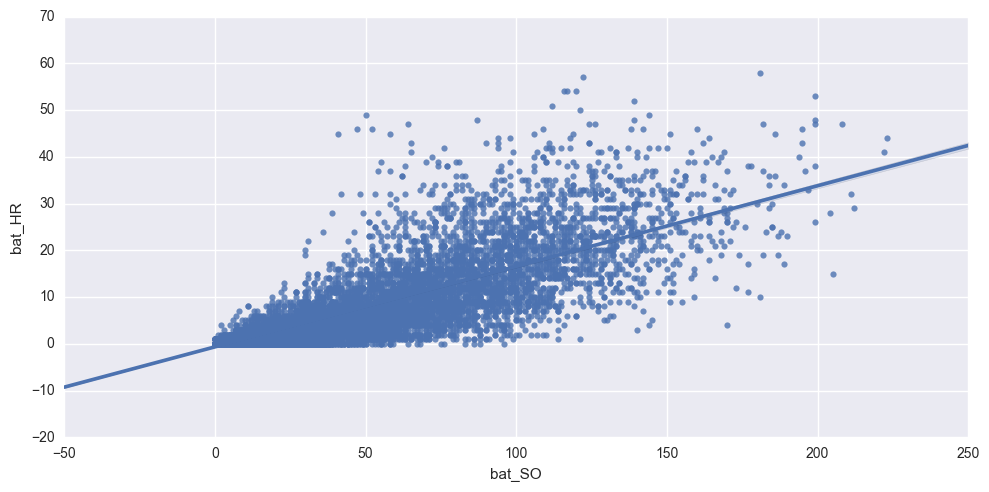

In [46]:
# explore home runs vs strikeouts (using batters)
sns.lmplot(x='bat_SO', y='bat_HR', data=lahman, aspect=2)

In [150]:
# interactive plot
# lahman.iplot(kind='scatter',x='bat_SO',y='bat_HR', mode='markers', size=2)

In [151]:
# takes too long to run
# sns.pairplot(batting_nums.dropna(), hue='lgID')

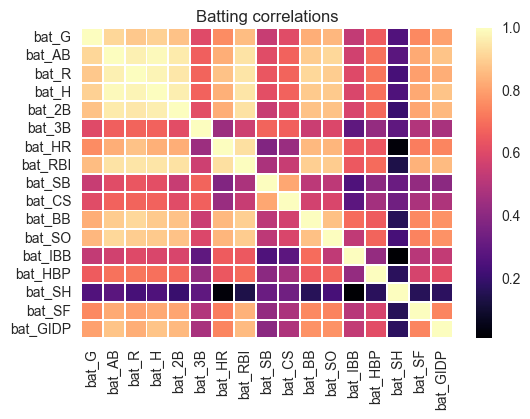

In [31]:
# heat map of batting correlations
sns.heatmap(batting_nums.corr(),cmap='magma', linecolor='white', linewidths=.7)
plt.title('Batting correlations')

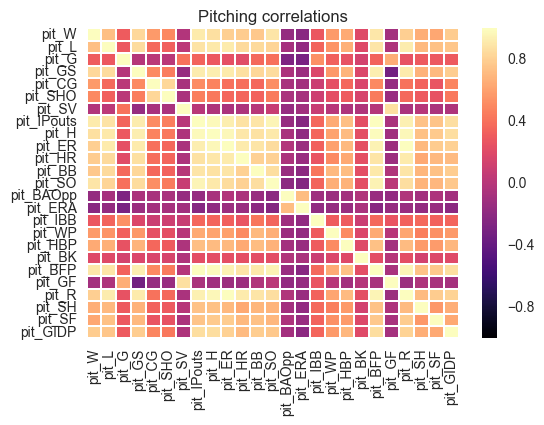

In [32]:
# heat map of pitching correlations
sns.heatmap(pitching_nums.corr(),cmap='magma', linecolor='white', linewidths=.7)
plt.title('Pitching correlations')

__How does HR vs SO ratio change over years?__

In [33]:
# create data frame of all stats summed per year
gb = lahman.groupby('Year').agg(sum)

In [34]:
gb.tail()

,stint,bat_G,bat_AB,bat_R,bat_H,bat_2B,bat_3B,bat_HR,bat_RBI,bat_SB,...,pit_IBB,pit_WP,pit_HBP,pit_BK,pit_BFP,pit_GF,pit_R,pit_SH,pit_SF,pit_GIDP
Year,,,,,,,,,,,,,,,,,,,,,
2011,1485,68729,165705.0,20808.0,42267.0,8399.0,898.0,4552.0,19804.0,3279.0,...,1231.0,1558.0,1554.0,169.0,185245.0,4685.0,20808.0,1667.0,1274.0,NaN
2012,1539,69519,165251.0,21017.0,42063.0,8261.0,927.0,4934.0,19998.0,3229.0,...,1055.0,1542.0,1494.0,165.0,184179.0,4732.0,21017.0,1479.0,1223.0,NaN
2013,1522,69268,166070.0,20255.0,42093.0,8222.0,772.0,4661.0,19271.0,2693.0,...,1018.0,1736.0,1536.0,128.0,184873.0,4738.0,20255.0,1383.0,1219.0,NaN
2014,1558,69564,165614.0,19761.0,41595.0,8137.0,849.0,4186.0,18745.0,2764.0,...,985.0,1696.0,1652.0,128.0,183929.0,4742.0,19761.0,1343.0,1277.0,3609.0
2015,1630,70534,165488.0,20647.0,42106.0,8242.0,939.0,4909.0,19650.0,2505.0,...,951.0,1758.0,1602.0,141.0,183628.0,4754.0,20647.0,1200.0,1232.0,NaN


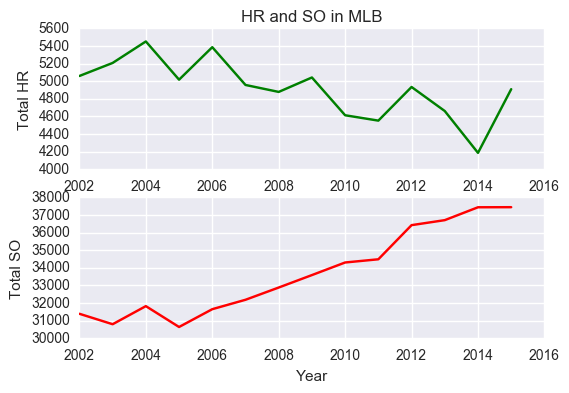

In [35]:
# plot HR and SO on facet plot
plt.subplot(2,1,1)
plt.plot(gb['bat_HR'], color='green')
plt.ylabel('Total HR')
plt.title('HR and SO in MLB')

plt.subplot(2,1,2)
plt.plot(gb['bat_SO'], color='red')
plt.ylabel('Total SO')
plt.xlabel('Year')

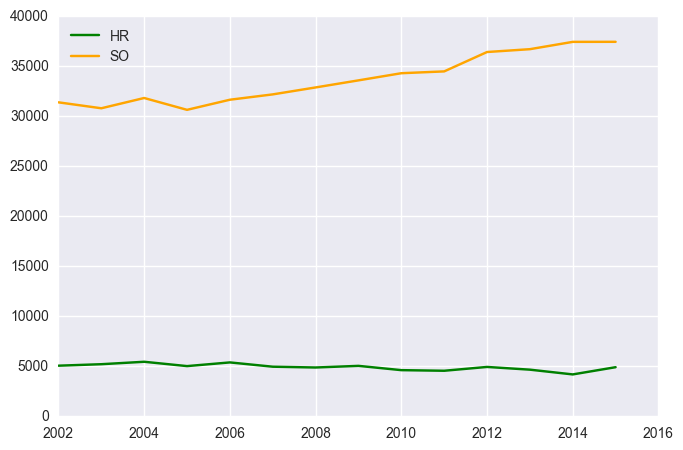

In [36]:
# recreate both plots above on same grid
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(gb['bat_HR'], color='green', label="HR")
ax.plot(gb['bat_SO'], color='orange', label="SO")
ax.legend(loc=0)

In [37]:
# group by leagues and years
gb_years = lahman.groupby(['Year','lgID']).agg(sum)
gb_years.tail(6)

stint  bat_G   bat_AB    bat_R    bat_H  bat_2B  bat_3B  bat_HR  \
Year lgID                                                                    
2013 AL      772  34407  83380.0  10525.0  21325.0  4183.0   348.0  2504.0   
     NL      750  34861  82690.0   9730.0  20768.0  4039.0   424.0  2157.0   
2014 AL      829  34836  83123.0  10161.0  21033.0  4132.0   390.0  2161.0   
     NL      729  34728  82491.0   9600.0  20562.0  4005.0   459.0  2025.0   
2015 AL      810  35103  82836.0  10651.0  21159.0  4166.0   459.0  2634.0   
     NL      820  35431  82652.0   9996.0  20947.0  4076.0   480.0  2275.0   

           bat_RBI  bat_SB    ...     pit_IBB  pit_WP  pit_HBP  pit_BK  \
Year lgID                     ...                                        
2013 AL    10028.0  1428.0    ...       452.0   904.0    736.0    61.0   
     NL     9243.0  1265.0    ...       566.0   832.0    800.0    67.0   
2014 AL     9636.0  1394.0    ...       462.0   863.0    832.0    74.0   
     NL     9109.0  1370.0    ...       523.0   833.0    820.0    54.0   
2015 AL    10142.0  1185.0    ...       391.0   938.0    820.0    62.0   
     NL     9508.0  1320.0    ...       560.0   820.0    782.0    79.0   

           pit_BFP  pit_GF    pit_R  pit_SH  pit_SF  pit_GIDP  
Year lgID                                                      
2013 AL    92681.0  2368.0  10436.0   456.0   656.0       NaN  
     NL    92192.0  2370.0   9819.0   927.0   563.0       NaN  
2014 AL    92156.0  2369.0  10052.0   461.0   687.0    1782.0  
     NL    91773.0  2373.0   9709.0   882.0   590.0    1827.0  
2015 AL    91705.0  2362.0  10422.0   469.0   644.0       NaN  
     NL    91923.0  2392.0  10225.0   731.0   588.0       NaN  

[6 rows x 43 columns]

In [38]:
# ratio of HR:SO added to df
gb_years['ratio'] = gb_years['bat_HR'] / gb_years['bat_SO']

In [39]:
gb_years['ratio'].describe()

count    28.000000
mean      0.147861
std       0.021339
min       0.105491
25%       0.133301
50%       0.150827
75%       0.163361
max       0.181021
Name: ratio, dtype: float64

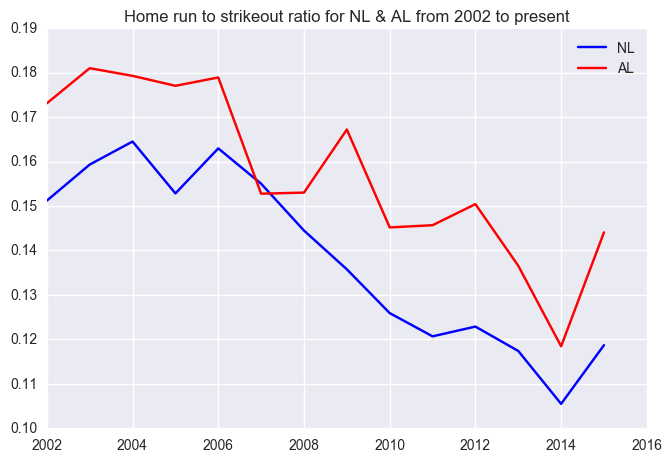

In [40]:
# plot ratio
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(np.array(gb_years.index.levels)[0], gb_years.loc[(slice(None), 'NL'), :]['ratio'], color='blue', label="NL")
ax.plot(np.array(gb_years.index.levels)[0], gb_years.loc[(slice(None), 'AL'), :]['ratio'], color='red', label="AL")
ax.legend(loc=0)

plt.title('Home run to strikeout ratio for NL & AL from {} to present'.format(sel))

In [41]:
# compare to top, mean, median HR hitter each year
gb_max_HR = lahman.groupby(['Year','lgID']).max()['bat_HR']

# for mean and median, set min AB = 100
gb_mean_HR = lahman[lahman['bat_AB'] >= 100].groupby(['Year','lgID']).mean()['bat_HR']
gb_mdn_HR = lahman[lahman['bat_AB'] >= 100].groupby(['Year','lgID']).median()['bat_HR']
gb_max_HR.tail(10)


Year  lgID
2011  AL      43.0
      NL      39.0
2012  AL      44.0
      NL      41.0
2013  AL      53.0
      NL      36.0
2014  AL      40.0
      NL      37.0
2015  AL      47.0
      NL      42.0
Name: bat_HR, dtype: float64

In [42]:
# extract values for each var above, for each league
NL_max_HR = gb_max_HR.loc[(slice(None),'NL')]
AL_max_HR = gb_max_HR.loc[(slice(None),'AL')]

NL_mean_HR = gb_mean_HR.loc[(slice(None),'NL')]
AL_mean_HR = gb_mean_HR.loc[(slice(None),'AL')]

NL_mdn_HR = gb_mdn_HR.loc[(slice(None),'NL')]
AL_mdn_HR = gb_mdn_HR.loc[(slice(None),'AL')]

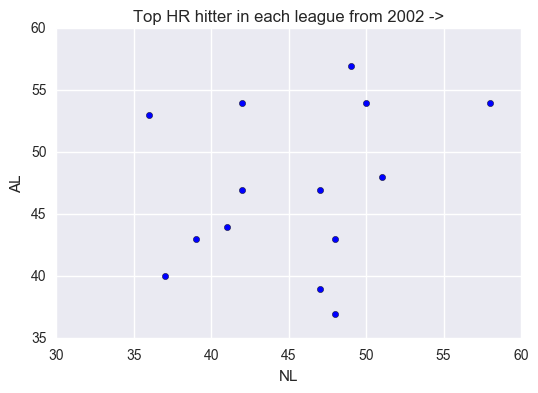

In [43]:
plt.scatter(NL_max_HR, AL_max_HR)
plt.ylabel('AL')
plt.xlabel('NL')
plt.title('Top HR hitter in each league from {} ->'.format(sel))


In [44]:
max = pd.concat([NL_max_HR, AL_max_HR],  axis=1)
max.columns = ['NL', 'AL']
max.tail()

,NL,AL
Year,,
2011,39.0,43.0
2012,41.0,44.0
2013,36.0,53.0
2014,37.0,40.0
2015,42.0,47.0


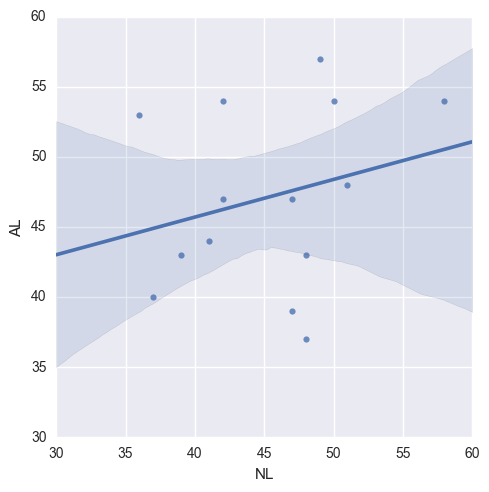

In [45]:
sns.lmplot('NL','AL',data=max)

In [46]:
# compare to top, mean, median SO pitcher each year
gb_max_SO = lahman.groupby(['Year','lgID']).max()['pit_SO']

# for mean and median, set min IP = 50 ('IPouts' >= 150)
gb_mean_SO = lahman[lahman['pit_IPouts'] >= 150].groupby(['Year','lgID']).mean()['pit_SO']
gb_mdn_SO = lahman[lahman['pit_IPouts'] >= 150].groupby(['Year','lgID']).median()['pit_SO']
gb_max_SO.tail(10)

Year  lgID
2011  AL      250.0
      NL      248.0
2012  AL      239.0
      NL      230.0
2013  AL      277.0
      NL      232.0
2014  AL      269.0
      NL      242.0
2015  AL      274.0
      NL      301.0
Name: pit_SO, dtype: float64

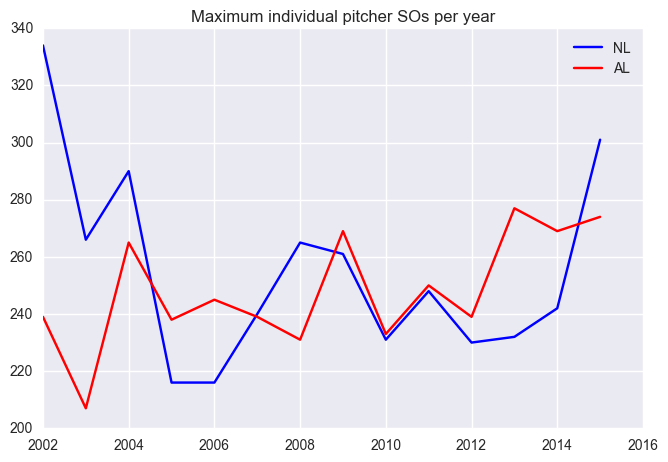

In [47]:
# plot top pitcher (by SOs) in each league
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(gb_max_SO.loc[(slice(None),'NL')], color='blue', label="NL")
ax.plot(gb_max_SO.loc[(slice(None),'AL')], color='red', label="AL")
ax.legend(loc=0)
plt.title('Maximum individual pitcher SOs per year')

NameError: name 'gb_max_HR' is not defined

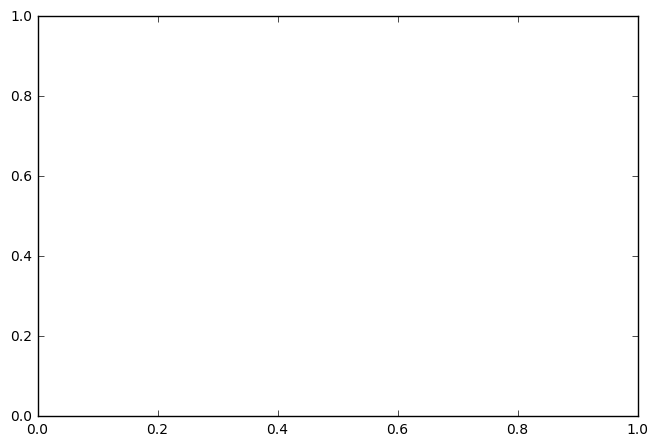

In [17]:
# plot top hitter (by HRs) in each league
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(gb_max_HR.loc[(slice(None),'NL')], color='blue', label="NL")
ax.plot(gb_max_HR.loc[(slice(None),'AL')], color='red', label="AL")
ax.legend(loc=0)

plt.title('Maximum individual hitter HRs per year')

---  
<h4 align="center">[Define question](#question) <- | -> [Wrangle data](#wrangle) <- | -> [Explore data ](#explore) <- | -> [Conclude / predict / interpret data](#analysis) <- | -> [To-do](#To-do) </h4> 

<a id= 'analysis'></a>

--- 
## IV. Analysis

In [87]:
# view columns in all_keep df, find numerical data
all_raw.columns

Index([       u'Year',        u'Team',       u'off_G',      u'off_PA',
            u'off_HR',       u'off_R',     u'off_RBI',      u'off_SB',
           u'off_BB%',      u'off_K%',     u'off_ISO',   u'off_BABIP',
           u'off_AVG',     u'off_OBP',     u'off_SLG',    u'off_wOBA',
          u'off_wRC+',     u'off_BsR',     u'off_Off',     u'off_Def',
           u'off_WAR',       u'pit_W',       u'pit_L',      u'pit_SV',
             u'pit_G',      u'pit_GS',      u'pit_IP',       u'pit_R',
           u'pit_K/9',    u'pit_BB/9',    u'pit_HR/9',   u'pit_BABIP',
          u'pit_LOB%',     u'pit_GB%',   u'pit_HR/FB',     u'pit_ERA',
           u'pit_FIP',    u'pit_xFIP',     u'pit_WAR',     u'def_Inn',
           u'def_rSB',    u'def_rGDP',    u'def_rARM',    u'def_rGFP',
           u'def_rPM',     u'def_DRS',     u'def_BIZ',   u'def_Plays',
           u'def_RZR',     u'def_OOZ',     u'def_CPP',     u'def_RPP',
           u'def_TZL',     u'def_FSR',     u'def_ARM',     u'def_DPR',
      

In [125]:
# subset relevant numerical data (remove lgID, games played, redundant cols, etc.)
cols_to_remove = ['off_G','pit_W','pit_L','pit_G','pit_GS','pit_IP','def_Inn']
all_keep = all_raw.drop(cols_to_remove, axis=1)
all_keep.columns

Index([       u'Year',        u'Team',      u'off_PA',      u'off_HR',
             u'off_R',     u'off_RBI',      u'off_SB',     u'off_BB%',
            u'off_K%',     u'off_ISO',   u'off_BABIP',     u'off_AVG',
           u'off_OBP',     u'off_SLG',    u'off_wOBA',    u'off_wRC+',
           u'off_BsR',     u'off_Off',     u'off_Def',     u'off_WAR',
            u'pit_SV',       u'pit_R',     u'pit_K/9',    u'pit_BB/9',
          u'pit_HR/9',   u'pit_BABIP',    u'pit_LOB%',     u'pit_GB%',
         u'pit_HR/FB',     u'pit_ERA',     u'pit_FIP',    u'pit_xFIP',
           u'pit_WAR',     u'def_rSB',    u'def_rGDP',    u'def_rARM',
          u'def_rGFP',     u'def_rPM',     u'def_DRS',     u'def_BIZ',
         u'def_Plays',     u'def_RZR',     u'def_OOZ',     u'def_CPP',
           u'def_RPP',     u'def_TZL',     u'def_FSR',     u'def_ARM',
           u'def_DPR',    u'def_RngR',    u'def_ErrR',     u'def_UZR',
       u'def_UZR/150',     u'def_Def',        u'lgID',           u'G',
      

In [126]:
# add RunDiff column
all_keep['RunDiff'] = all_keep['off_R'] - all_keep['pit_R']
# add total WAR column
all_keep['WAR'] = all_keep['off_WAR'] + all_keep['pit_WAR']

In [127]:
# move year and team info from column to index
all_keep = all_keep.set_index(['Team','Year'])
all_keep.head()

off_PA  off_HR   off_R  off_RBI  off_SB off_BB%  off_K%  \
Team    Year                                                              
Yankees 1927.0  6222.0   158.0   976.0    908.0    90.0  10.3 %   9.8 %   
Reds    1976.0  6538.0   141.0   857.0    802.0   210.0  10.4 %  13.8 %   
Yankees 1931.0  6473.0   155.0  1067.0    990.0   139.0  11.6 %   8.6 %   
        1939.0  6129.0   166.0   967.0    904.0    72.0  11.4 %   8.9 %   
Orioles 1969.0  6328.0   175.0   779.0    722.0    82.0  10.0 %  12.7 %   

                off_ISO  off_BABIP  off_AVG  ...       G      W     L  DivWin  \
Team    Year                                 ...                                
Yankees 1927.0    0.181      0.324    0.307  ...   155.0  110.0  44.0     NaN   
Reds    1976.0    0.144      0.309    0.280  ...   162.0  102.0  60.0       Y   
Yankees 1931.0    0.160      0.309    0.297  ...   155.0   94.0  59.0     NaN   
        1939.0    0.164      0.295    0.287  ...   152.0  106.0  45.0     NaN   
Orioles 1969.0    0.148      0.281    0.265  ...   162.0  109.0  53.0       Y   

                WCWin  LgWin  WSWin  playoffs  RunDiff   WAR  
Team    Year                                                  
Yankees 1927.0    NaN      Y      Y     False    377.0  66.3  
Reds    1976.0    NaN      Y      Y      True    224.0  60.5  
Yankees 1931.0    NaN      N      N     False    307.0  59.3  
        1939.0    NaN      Y      Y     False    411.0  59.3  
Orioles 1969.0    NaN      Y      N      True    262.0  65.1  

[5 rows x 63 columns]

__Linear regression: Separate data into predictors (numerical) & outcomes (numerical)__

In [139]:
# separate WAR as predictor for univariate analysis
war = all_keep.ix[:,'WAR']
# war

In [55]:
# create predictors df
preds1 = all_keep.ix[:,:'def_Def']
preds1.head()
preds2 = pd.DataFrame(all_keep['RunDiff'])
preds2.head()
preds = pd.concat([preds1,preds2],axis=1)
preds.head()

index  off_PA  off_HR  off_R  off_RBI  off_SB off_BB%  off_K%  \
Team    Year                                                                  
Angels  2012      0    6121     187    767      732     134   7.3 %  18.2 %   
Red Sox 2011      1    6414     203    875      842     102   9.0 %  17.3 %   
        2013      2    6382     178    853      819     123   9.1 %  20.5 %   
Braves  2003      3    6378     235    907      872      68   8.5 %  14.6 %   
Giants  2002      4    6304     198    784      751      74   9.8 %  15.2 %   

              off_ISO  off_BABIP   ...     def_TZL  def_FSR  def_ARM  def_DPR  \
Team    Year                       ...                                          
Angels  2012    0.159      0.311   ...         NaN     34.0      4.3      1.4   
Red Sox 2011    0.181      0.314   ...         NaN     16.0     -3.5      0.1   
        2013    0.169      0.329   ...         NaN     20.0     -2.0     -1.8   
Braves  2003    0.192      0.302   ...         NaN      NaN      5.2      0.4   
Giants  2002    0.175      0.289   ...         NaN      NaN     -3.3      4.2   

              def_RngR  def_ErrR  def_UZR  def_UZR/150  def_Def  RunDiff  
Team    Year                                                              
Angels  2012      58.5      -4.0     60.2          8.7     62.5       68  
Red Sox 2011      42.1       5.3     44.0          5.3     30.4      138  
        2013      23.0       2.3     21.6          2.6     16.2      197  
Braves  2003      13.2     -11.1      7.6          1.9      2.6      167  
Giants  2002      29.3       3.6     33.8          4.2     33.8      168  

[5 rows x 54 columns]

In [56]:
# drop columns with NAs from preds
preds.dropna(axis=1, inplace=True)
preds.describe()

# also looks like missing data for def_Plays, def_OOZ - drop these as well
preds.drop(['def_rSB','def_rGDP','def_rARM','def_rGFP','def_DRS','def_BIZ','def_Plays','def_OOZ'], axis=1, inplace=True)
preds.describe()

# change % vars to float for lm
pred_percents = preds.select_dtypes(include=['object']).apply(lambda x: x.str.replace('[%*]', '').astype(float)/100, axis=1)
pred_nums = preds.select_dtypes(exclude=['object'])
preds = pd.concat([pred_percents,pred_nums],axis=1)
preds.head()

off_BB%  off_K%  pit_LOB%  pit_GB%  pit_HR/FB  index  off_PA  \
Team    Year                                                                 
Angels  2012    0.073   0.182     0.726    0.439      0.121      0    6121   
Red Sox 2011    0.090   0.173     0.708    0.423      0.091      1    6414   
        2013    0.091   0.205     0.745    0.429      0.102      2    6382   
Braves  2003    0.085   0.146     0.706    0.476      0.110      3    6378   
Giants  2002    0.098   0.152     0.740    0.423      0.073      4    6304   

              off_HR  off_R  off_RBI   ...     pit_WAR  def_rPM  def_ARM  \
Team    Year                           ...                                 
Angels  2012     187    767      732   ...         8.9       28      4.3   
Red Sox 2011     203    875      842   ...        13.7       38     -3.5   
        2013     178    853      819   ...        16.0       14     -2.0   
Braves  2003     235    907      872   ...        15.2       50      5.2   
Giants  2002     198    784      751   ...        18.1        0     -3.3   

              def_DPR  def_RngR  def_ErrR  def_UZR  def_UZR/150  def_Def  \
Team    Year                                                               
Angels  2012      1.4      58.5      -4.0     60.2          8.7     62.5   
Red Sox 2011      0.1      42.1       5.3     44.0          5.3     30.4   
        2013     -1.8      23.0       2.3     21.6          2.6     16.2   
Braves  2003      0.4      13.2     -11.1      7.6          1.9      2.6   
Giants  2002      4.2      29.3       3.6     33.8          4.2     33.8   

              RunDiff  
Team    Year           
Angels  2012       68  
Red Sox 2011      138  
        2013      197  
Braves  2003      167  
Giants  2002      168  

[5 rows x 41 columns]

In [59]:
preds.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 420 entries, (Angels, 2012) to (Tigers, 2003)
Data columns (total 41 columns):
off_BB%        420 non-null float64
off_K%         420 non-null float64
pit_LOB%       420 non-null float64
pit_GB%        420 non-null float64
pit_HR/FB      420 non-null float64
index          420 non-null int64
off_PA         420 non-null int64
off_HR         420 non-null int64
off_R          420 non-null int64
off_RBI        420 non-null int64
off_SB         420 non-null int64
off_ISO        420 non-null float64
off_BABIP      420 non-null float64
off_AVG        420 non-null float64
off_OBP        420 non-null float64
off_SLG        420 non-null float64
off_wOBA       420 non-null float64
off_wRC+       420 non-null int64
off_BsR        420 non-null float64
off_Off        420 non-null float64
off_Def        420 non-null float64
off_WAR        420 non-null float64
pit_SV         420 non-null int64
pit_R          420 non-null int64
pit_K/9        420 non-nu

In [83]:
# off_preds = preds.loc[:,('off_HR','off_BB%','off_AVG')]
off_preds = preds.loc[:,'off_Off']
off_preds.describe()

count    420.000000
mean     -27.958571
std       65.720165
min     -212.200000
25%      -77.150000
50%      -29.950000
75%       13.500000
max      168.400000
Name: off_Off, dtype: float64

In [154]:
# use wins as outcome for linear regression
wins = all_keep['W']
wins.describe()

count    2177.000000
mean       78.587046
std        13.191947
min        36.000000
25%        70.000000
50%        79.000000
75%        88.000000
max       116.000000
Name: W, dtype: float64

In [157]:
war_reg = all_keep.ix[:,['WAR','W']].dropna()

war_reg.describe()

,WAR,W
count,2164.000000,2164.000000
mean,32.407763,78.659427
std,10.916206,13.184841
min,-1.700000,36.000000
25%,24.800000,70.000000
50%,32.700000,79.000000
75%,40.500000,88.000000
max,66.300000,116.000000


In [161]:
war_pred = war_reg['WAR']
war_pred.count()

2164

In [163]:
war_out = war_reg['W']
war_out.count()

2164

__Split data into training and test sets, fit linear model__

In [135]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [164]:
# linear analysis for one WAR
X_train, X_test, y_train, y_test = train_test_split(war_pred, war_out, test_size=0.3, random_state=101)

In [126]:
# set params for model, use 30% of data for test set
X_train, X_test, y_train, y_test = train_test_split(off_preds, wins, test_size=0.3, random_state=101)

In [165]:
# train model
lm = LinearRegression()
# lm.fit(X_train,y_train)
lm.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

__Apply model to test data to evaluate it__

In [166]:
# predictions = lm.predict(X_test)
predictions = lm.predict(X_test.reshape(-1,1))

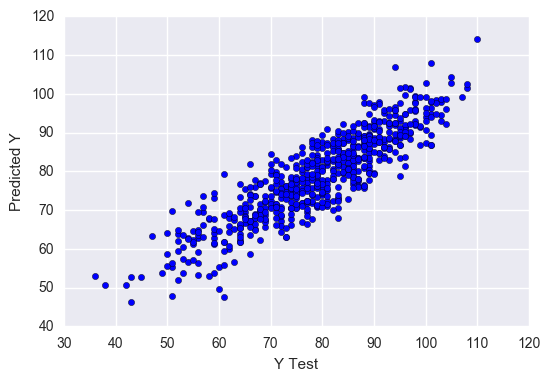

In [169]:
# view scatter plot of predictions vs. actual values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [170]:
# view model metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, predictions)))

('MAE:', 4.8364396533132457)
('MSE:', 36.852869787755345)
('RMSE:', 6.0706564544335189)
('R^2:', 0.88779534583463993)


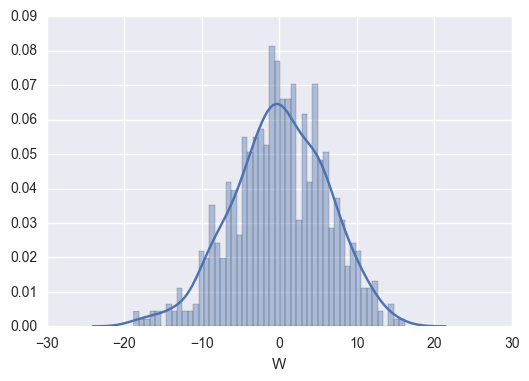

In [171]:
# plot residuals, should approximate normal distribution
sns.distplot((y_test-predictions),bins=50)


In [172]:
# view coefficients table
# interpretation of table: 1-unit increase in variable in column 1 corresponds with 
# coefficients = pd.DataFrame(lm.coef_,'off_preds.columns')
# coefficients.columns = ['Coefficient']
# coefficients.sort('Coefficient',ascending=False)

lm.coef_

array([ 1.04969033])

## Logistic regression using made playoffs, won penant, won WS

In [232]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [233]:
# drop redundant L column (L = 162-W), G column (all teams played 162)
log = all_keep.drop(['L','G'],axis=1)

In [234]:
# create df, replace Y/N values with 0/1 for 'DivWin','WCWin','LgWin','WSWin'
outcomes1 = log[['DivWin','WCWin','LgWin','WSWin']].replace({'N':0,'Y':1})

In [235]:
# create dummy variables
lgID_dummy = pd.get_dummies(log[['lgID']],drop_first=True)
playoffs_dummy = pd.get_dummies(log['playoffs'],drop_first=True)
playoffs_dummy.columns = ['Playoffs']

In [236]:
# create df for logistic regression predictors
log_preds = log.drop(['DivWin','WCWin','LgWin','WSWin','playoffs','lgID'],axis=1)

In [237]:
# change % vars to float for lm
log_pred_percents = log_preds.select_dtypes(include=['object']).apply(lambda x: x.str.replace('[%*]', '').astype(float)/100, axis=1)
log_pred_nums = log_preds.select_dtypes(exclude=['object'])
log_preds = pd.concat([log_pred_percents,log_pred_nums],axis=1)
log_preds.head()

off_BB%  off_K%  pit_LOB%  pit_GB%  pit_HR/FB  level_0  index  \
Team    Year                                                                  
Angels  2012    0.073   0.182     0.726    0.439      0.121        0      0   
Red Sox 2011    0.090   0.173     0.708    0.423      0.091        1      1   
        2013    0.091   0.205     0.745    0.429      0.102        2      2   
Braves  2003    0.085   0.146     0.706    0.476      0.110        3      3   
Giants  2002    0.098   0.152     0.740    0.423      0.073        4      4   

              off_PA  off_HR  off_R   ...     def_FSR  def_ARM  def_DPR  \
Team    Year                          ...                                 
Angels  2012    6121     187    767   ...        34.0      4.3      1.4   
Red Sox 2011    6414     203    875   ...        16.0     -3.5      0.1   
        2013    6382     178    853   ...        20.0     -2.0     -1.8   
Braves  2003    6378     235    907   ...         NaN      5.2      0.4   
Giants  2002    6304     198    784   ...         NaN     -3.3      4.2   

              def_RngR  def_ErrR  def_UZR  def_UZR/150  def_Def    W  RunDiff  
Team    Year                                                                   
Angels  2012      58.5      -4.0     60.2          8.7     62.5   89       68  
Red Sox 2011      42.1       5.3     44.0          5.3     30.4   90      138  
        2013      23.0       2.3     21.6          2.6     16.2   97      197  
Braves  2003      13.2     -11.1      7.6          1.9      2.6  101      167  
Giants  2002      29.3       3.6     33.8          4.2     33.8   95      168  

[5 rows x 56 columns]

In [238]:
# drop columns with NAs
log_preds.dropna(axis=1, inplace=True)

# also looks like missing data for def_Plays, def_OOZ - drop these as well
log_preds.drop(['def_rSB','def_rGDP','def_rARM','def_rGFP','def_DRS','def_BIZ','def_Plays','def_OOZ'], axis=1, inplace=True)
log_preds.describe()

,off_BB%,off_K%,pit_LOB%,pit_GB%,pit_HR/FB,level_0,index,off_PA,off_HR,off_R,...,def_rPM,def_ARM,def_DPR,def_RngR,def_ErrR,def_UZR,def_UZR/150,def_Def,W,RunDiff
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.082976,0.181071,0.720455,0.441621,0.104429,209.500000,209.500000,6208.892857,163.933333,730.504762,...,-0.333333,-0.002381,0.015476,0.001905,0.009524,0.021905,0.034286,-0.061429,80.973810,0.030952
std,0.009861,0.022733,0.022763,0.022046,0.013554,121.387808,121.387808,114.358835,32.877081,81.210311,...,30.826148,7.822115,3.871279,29.175432,8.060150,32.377808,5.011620,33.937258,11.420234,104.783498
min,0.061000,0.127000,0.657000,0.382000,0.069000,0.000000,0.000000,5905.000000,91.000000,513.000000,...,-110.000000,-22.900000,-9.100000,-136.000000,-23.200000,-141.700000,-19.200000,-147.700000,43.000000,-337.000000
25%,0.076000,0.164000,0.705000,0.426000,0.094750,104.750000,104.750000,6130.000000,140.750000,670.500000,...,-20.000000,-5.500000,-2.800000,-19.400000,-5.225000,-20.900000,-3.300000,-23.250000,72.000000,-79.000000
50%,0.083000,0.179500,0.720000,0.440000,0.103000,209.500000,209.500000,6206.000000,161.500000,725.500000,...,0.000000,-0.300000,0.000000,0.850000,0.400000,-0.200000,0.150000,-0.600000,81.000000,5.000000
75%,0.089000,0.197000,0.737000,0.456000,0.115000,314.250000,314.250000,6284.000000,185.000000,784.250000,...,20.000000,5.100000,2.700000,22.650000,5.325000,23.800000,3.100000,22.425000,90.000000,80.000000
max,0.109000,0.255000,0.794000,0.525000,0.141000,419.000000,419.000000,6537.000000,260.000000,968.000000,...,89.000000,27.000000,10.900000,92.300000,21.000000,86.000000,14.300000,96.900000,105.000000,221.000000


In [239]:
# create test-train split
X_train, X_test, y_train, y_test = train_test_split(log_preds, playoffs_dummy, test_size=0.30, random_state=101)

In [240]:
# train model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [241]:
# create array of predictions
predictions = logmodel.predict(X_test)

In [242]:
# evaluate our model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93        85
        1.0       0.85      0.85      0.85        41

avg / total       0.90      0.90      0.90       126



In [257]:
coefficients = pd.DataFrame(logmodel.coef_,columns=list(log_preds.columns.values))
coefficients = coefficients.set_index()
# coefficients.columnsmns = ['Coefficient']
# coefficients.sort('Coefficient',ascending=False)
coefficients

SyntaxError: invalid syntax (<ipython-input-257-95e365cda357>, line 2)

In [264]:
print(logmodel.coef_)
print(list(log_preds.columns.values))

[[  7.01262398e-03   3.37760639e-03  -5.96730162e-03   5.88765268e-03
   -4.99454682e-04  -1.25195940e-02  -1.25195940e-02  -8.09430021e-03
    7.36862291e-03  -5.78784163e-03  -3.54108683e-03   1.30452878e-02
    4.33961443e-04   5.96627500e-04  -2.14558962e-03   4.12508272e-03
   -1.83474663e-03   3.40274418e-03  -3.11397430e-01  -8.10534223e-02
   -2.27301483e-02  -9.33349166e-04   3.96371314e-01  -1.18602124e-01
    5.79439989e-03  -2.26519319e-01  -4.50426811e-01  -1.23119441e-02
    6.31515418e-03   1.13424698e-02   1.33729415e-03  -7.05576335e-02
    8.30939724e-02  -1.67056044e-02   4.45891806e-02  -1.59792865e-01
   -1.06593018e-02   3.43140773e-02  -2.62770902e-02  -1.04270346e-01
   -4.72694845e-02   9.59719790e-01  -1.15822415e-02]]
[u'off_BB%', u'off_K%', u'pit_LOB%', u'pit_GB%', u'pit_HR/FB', 'level_0', 'index', u'off_PA', u'off_HR', u'off_R', u'off_RBI', u'off_SB', u'off_ISO', u'off_BABIP', u'off_AVG', u'off_OBP', u'off_SLG', u'off_wOBA', u'off_wRC+', u'off_BsR', u'off_O

In [266]:
log_preds.columns.values.dtype

dtype('O')

In [267]:
logmodel.coef_.dtype

dtype('float64')

---  
<h4 align="center">[Define question](#question) <- | -> [Wrangle data](#wrangle) <- | -> [Explore data ](#explore) <- | -> [Conclude / predict / interpret data](#analysis) <- | -> [To-do](#To-do) </h4> 

<a id= 'To-do'></a>

---  
## V. To-do data